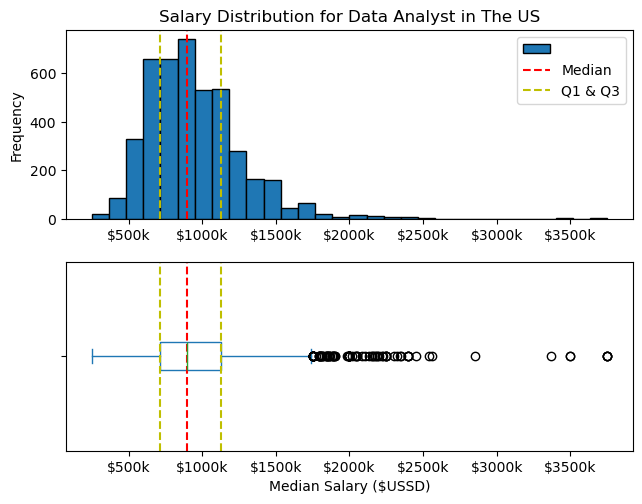

In [14]:
import ast 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../pandas/data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


def box_plot(x):
    if pd.notna(x):
        return ast.literal_eval(x)
    else:
        return x
df['job_skills'] = df['job_skills'].apply(box_plot)
# fig,ax = plt.subplots()
df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_DA_US = df_DA.dropna(subset=['salary_year_avg'])

fig,ax = plt.subplots(2,1)
fig.tight_layout(h_pad=1)


df_DA_US['salary_year_avg'].plot(kind='hist',ax=ax[0],bins=30,edgecolor='black')
ax[0].set_title('Salary Distribution for Data Analyst in The US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:'${0:g}k'.format(x/100)))

ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r',linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y',linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y',linestyle='--')
ax[0].legend(['','Median','Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind='box',ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USSD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:'${0:g}k'.format(x/100)))


ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r',linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y',linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y',linestyle='--')
plt.show()



